- we have two types of scaling

    - Z score (Standardization)

    - Min max scalar (Normalization)

**Z score**

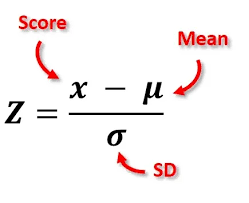

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path=r"C:\Users\omkar\OneDrive\Documents\Gen_AI\Data_files\Visadataset.csv"
visa_df=pd.read_csv(file_path)


cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [ ]:
# step-1: take the pwage data
# step-2: calculate mean of the data
# step-3: calculate std of the data
# step-4: Nr= data-mean step1 - step2
# step-5: z_Wage=Nr/std = Step4/Step3
# step-6: Create a new colum visa_df['z_Wage']=z_Wage

In [7]:
wage_data=visa_df['prevailing_wage']
wage_mean=wage_data.mean()
wage_std=wage_data.std()
Nr=wage_data-wage_mean
z_Wage=Nr/wage_std
visa_df['z_Wage']=z_Wage

In [9]:
visa_df[['prevailing_wage','z_Wage']]

,prevailing_wage,z_Wage
0,592.2029,-1.398510
1,83425.6500,0.169832
2,122996.8600,0.919060
3,83434.0300,0.169991
4,149907.3900,1.428576
...,...,...
25475,77092.5700,0.049923
25476,279174.7900,3.876083
25477,146298.8500,1.360253
25478,86154.7700,0.221504


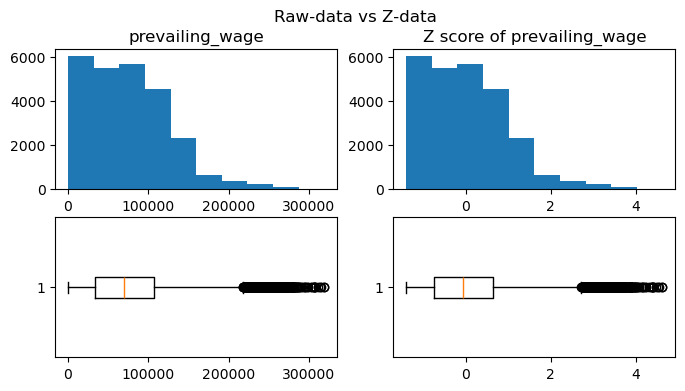

In [27]:
plt.figure(figsize=(8,4))
plt.suptitle('Raw-data vs Z-data')
plt.subplot(2,2,1).hist(wage_data)
plt.title('prevailing_wage')
plt.subplot(2,2,2).hist(z_Wage)
plt.title('Z score of prevailing_wage')
plt.subplot(2,2,3).boxplot(wage_data,vert=False)
plt.subplot(2,2,4).boxplot(z_Wage,vert=False)
plt.show()

**StandardScalar**

- sklearn

  - preprocessing

      - StandardScalar



In [36]:
# step-1: import method
# step-2: save the method
# step-3: apply fit transform
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
wage_ss=ss.fit_transform(visa_df[['prevailing_wage']])
visa_df['wage_ss']=wage_ss

In [38]:
visa_df[['prevailing_wage','z_Wage','wage_ss']]


,prevailing_wage,z_Wage,wage_ss
0,592.2029,-1.398510,-1.398537
1,83425.6500,0.169832,0.169835
2,122996.8600,0.919060,0.919079
3,83434.0300,0.169991,0.169994
4,149907.3900,1.428576,1.428604
...,...,...,...
25475,77092.5700,0.049923,0.049924
25476,279174.7900,3.876083,3.876159
25477,146298.8500,1.360253,1.360280
25478,86154.7700,0.221504,0.221509


In [46]:
visa_df
visa_df['prevailing_wage']
visa_df['prevailing_wage'].values
visa_df[['prevailing_wage']]

,prevailing_wage
0,592.2029
1,83425.6500
2,122996.8600
3,83434.0300
4,149907.3900
...,...
25475,77092.5700
25476,279174.7900
25477,146298.8500
25478,86154.7700


In [60]:
visa_df
visa_df['prevailing_wage']
visa_df['prevailing_wage'].values
visa_df['prevailing_wage'].values.reshape(-1,1)

array([[   592.2029],
       [ 83425.65  ],
       [122996.86  ],
       ...,
       [146298.85  ],
       [ 86154.77  ],
       [ 70876.91  ]])

In [62]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
wage_ss=ss.fit_transform(visa_df['prevailing_wage'].values.reshape(-1,1))
wage_ss

array([[-1.39853722],
       [ 0.1698353 ],
       [ 0.91907852],
       ...,
       [ 1.36027953],
       [ 0.22150859],
       [-0.06776315]])

**MinMaxScalar**

<img src="https://miro.medium.com/v2/resize:fit:888/1*ye1I00S61GqpR34ABZZFLQ.png" jsaction="" class="sFlh5c FyHeAf iPVvYb" style="max-width: 444px; height: 107px; margin: 19.5px 0px; width: 305px;" alt="How Min-Max Scaler Works. The math behind the min-max scaler | by Kamlesh  Kumar Rangi | Medium" jsname="kn3ccd">

In [ ]:
# step-1: read the data
# step-2: calculate min
# step-3: calculate max
# step-4: Nr=step1-step2
# step-5: Dr=Step3-Step2
# step-6: Nr/Dr
# step-7: visa_df['wage_min_max']=Nr/Dr

**MinMaxScalar**

In [73]:
wage_data=visa_df['prevailing_wage']
wag_data_min=wage_data.min()
wage_data_max=wage_data.max()
Nr=wage_data-wag_data_min
Dr=wage_data_max-wag_data_min
max(Nr/Dr),min(Nr/Dr)

(1.0, 0.0)

In [77]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit_transform(visa_df['prevailing_wage'].values.reshape(-1,1))

array([[0.00184853],
       [0.2613452 ],
       [0.385312  ],
       ...,
       [0.45831136],
       [0.26989486],
       [0.22203311]])